<a href="https://colab.research.google.com/github/helloitsmimi/helloitsmimi/blob/master/%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0_%EC%A0%84_%ED%9B%84_%EC%9D%B4%EB%8F%99%EC%88%98%EB%8B%A8_%EC%9D%B4%EC%9A%A9_%EB%B3%80%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

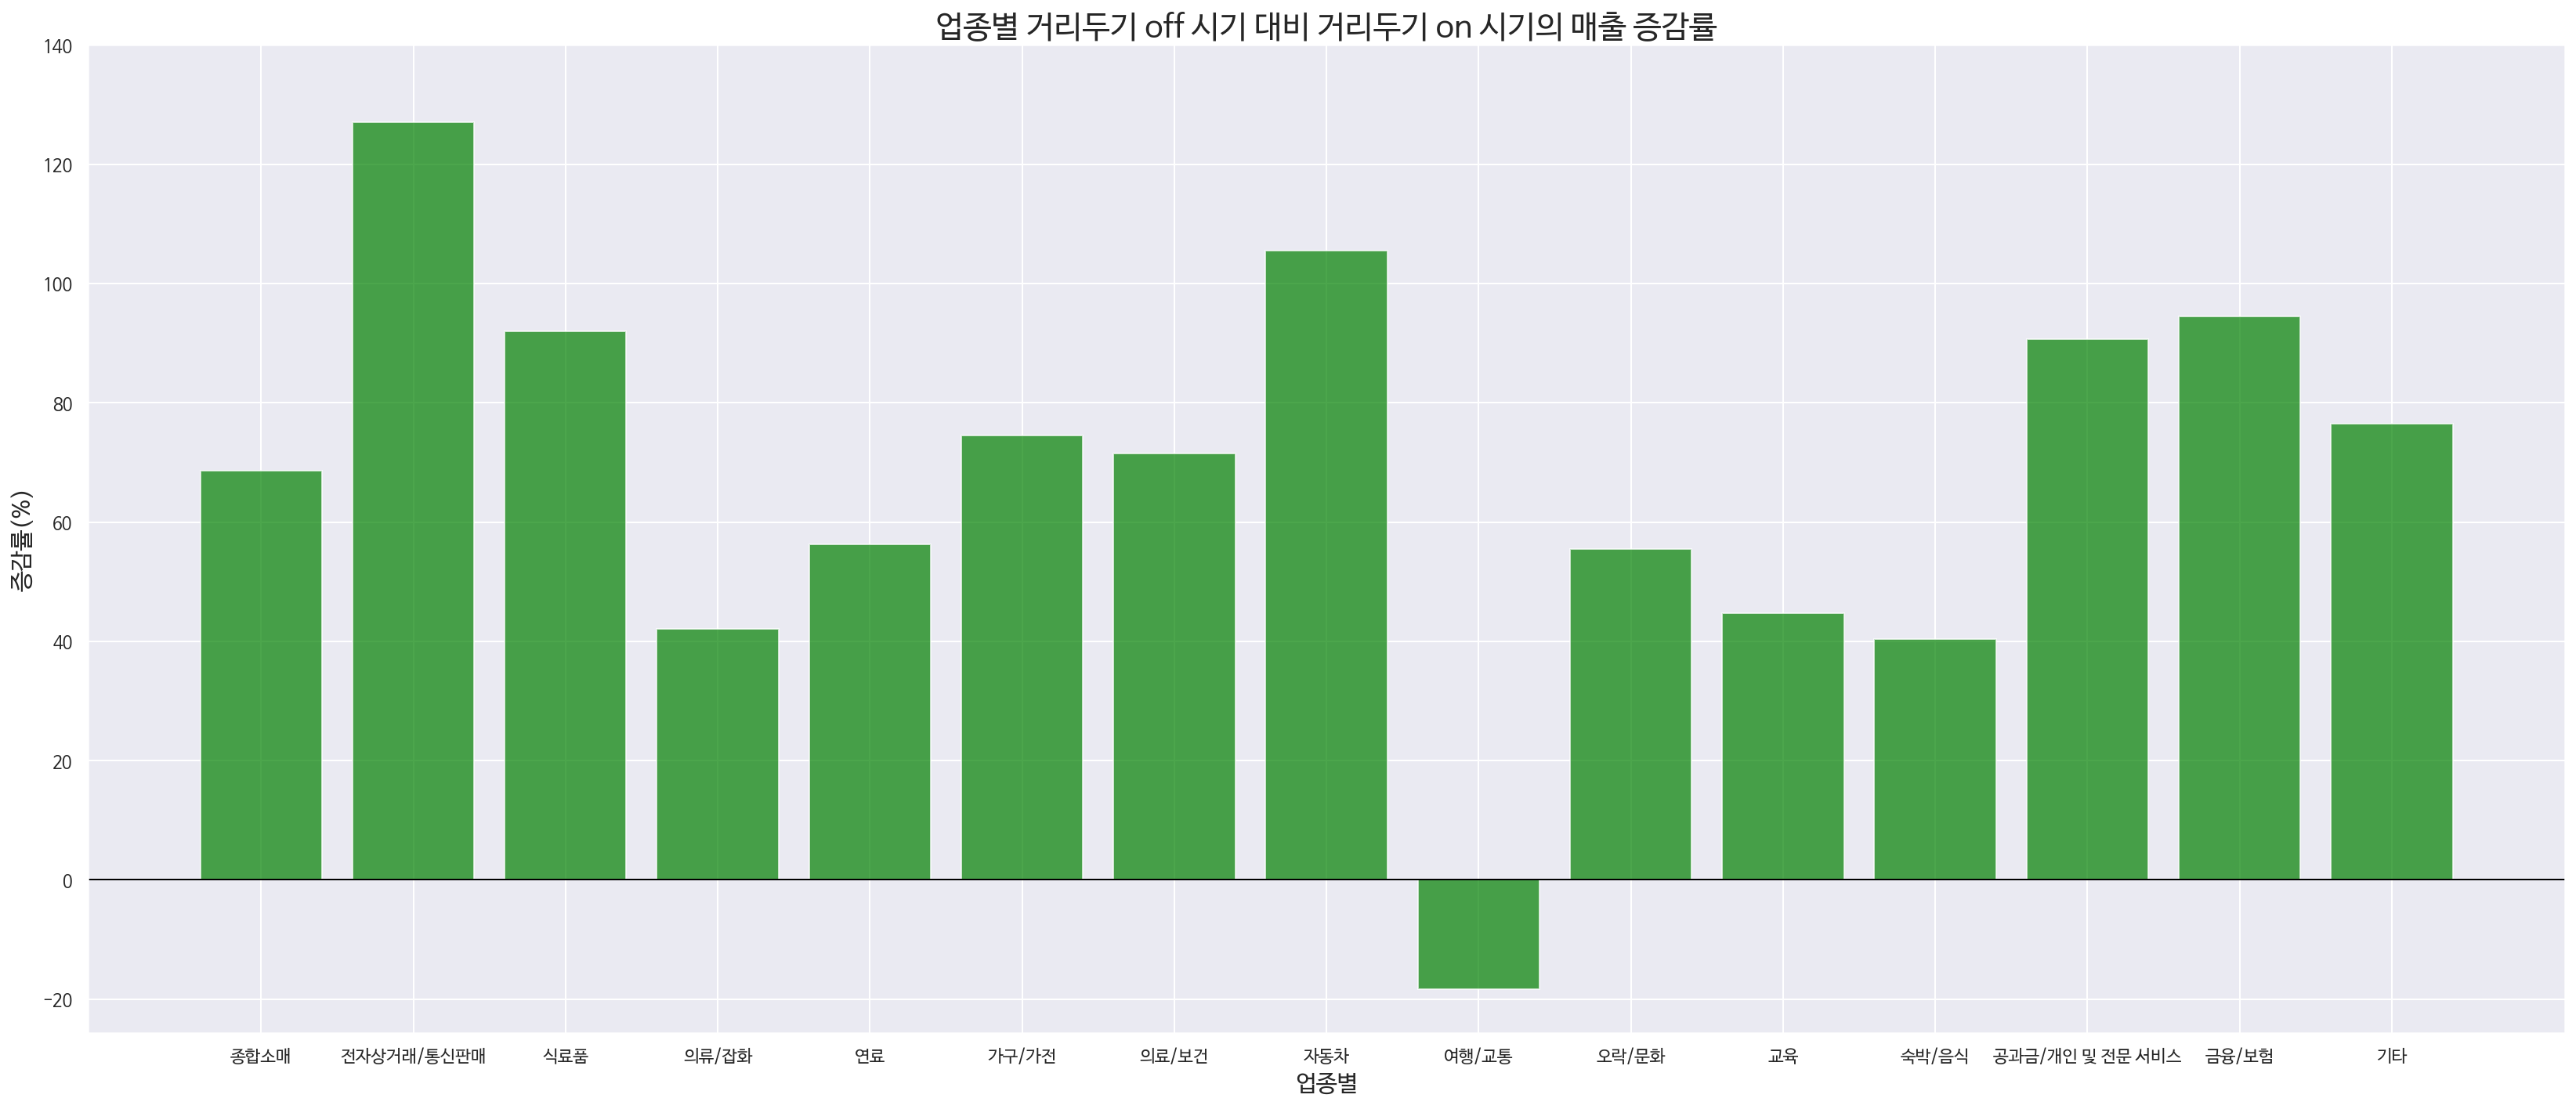

# 분석 방향
- 거리두기 전/후 매출 증감률 2위 : 자동차
- 자동차의 매출이 증가했다면, 자가용 이용량도 증가했을까?
- 대중교통 이용량, 자가용 이용량 변화 살펴보기
1. 자동차 매출 변화 : 시계열 그래프
2. 대중교통 이용량 변화
- 버스 이용량 시계열
- 지하철 이용량 시계열
- 자가용 이용량 시계열
- 위에 3개 합쳐서 누적 연속그래프 그려보기
- 거리두기 전의 버스/지하철/자가용 이용 비율 // 거리두기 후의 버스/지하철/자가용 이용비율 : 막대그래프 


# 폰트 설정 코드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 자동차 업종 매출 변화
- 시계열 그래프
- 사용 데이터 : `신용카드 지역별 월간일평균 데이터 원단위`

In [ ]:
import pandas as pd

sales = pd.read_csv("/content/신용카드 지역별_월간일평균_데이터(원단위).csv", thousands = ',', encoding='cp949')
sales.tail()

,통계표,항목명1,항목명2,항목명3,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
542,5.8.2 지역별 소비유형별 개인 신용카드,기타,금융/보험,월간 일평균,원,원자료,454292859.0,451036139.0,486427582.0,438039780.0,...,388132078.0,368804093.0,380146057.0,389708664.0,342436874.0,367100441.0,336365608.0,311582587.0,350425209.0,313145715.0
543,5.8.2 지역별 소비유형별 개인 신용카드,기타,기타,월간 일평균,원,원자료,564220463.0,490349789.0,509714433.0,532892934.0,...,397590437.0,369857355.0,379084197.0,424782765.0,329172222.0,366821291.0,316186275.0,333581772.0,320778952.0,373026786.0
544,5.8.2 지역별 소비유형별 개인 신용카드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,통계담당 : 한국은행 금융결제국 결제안정팀(02-750-6657),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,주 : 지역별(가맹점 소재지 기준) 소비유형별 개인 신용카드 실적은 실승인실적 기준...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 마지막 3행 제외
sales = sales[:-3]

sales.head()

,통계표,항목명1,항목명2,항목명3,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,5.8.2 지역별 소비유형별 개인 신용카드,서울,합계,월간 일평균,원,원자료,6.924026e+11,6.461317e+11,6.644611e+11,6.895258e+11,...,8.590723e+11,8.603034e+11,8.789980e+11,9.034594e+11,8.365540e+11,8.808657e+11,8.840144e+11,9.325143e+11,9.246145e+11,9.437860e+11
1,5.8.2 지역별 소비유형별 개인 신용카드,서울,백화점,월간 일평균,원,원자료,1.558884e+10,1.533836e+10,1.649840e+10,1.647569e+10,...,1.803957e+10,1.931174e+10,1.775351e+10,1.495184e+10,1.540847e+10,1.766069e+10,1.993851e+10,2.120547e+10,2.034954e+10,1.948790e+10
2,5.8.2 지역별 소비유형별 개인 신용카드,서울,대형마트/유통전문점,월간 일평균,원,원자료,2.000189e+10,1.906961e+10,1.958531e+10,1.974282e+10,...,1.785718e+10,1.872759e+10,1.801518e+10,1.819156e+10,1.831319e+10,1.896515e+10,1.798696e+10,1.907008e+10,1.813231e+10,1.930281e+10
3,5.8.2 지역별 소비유형별 개인 신용카드,서울,슈퍼마켓,월간 일평균,원,원자료,1.454884e+10,1.395466e+10,1.428419e+10,1.454497e+10,...,1.313956e+10,1.326416e+10,1.354326e+10,1.398310e+10,1.403236e+10,1.440681e+10,1.328119e+10,1.435294e+10,1.353245e+10,1.407304e+10
4,5.8.2 지역별 소비유형별 개인 신용카드,서울,편의점,월간 일평균,원,원자료,5.726324e+09,5.534512e+09,5.949382e+09,6.312534e+09,...,6.828613e+09,6.904505e+09,7.456812e+09,7.293518e+09,7.278829e+09,7.384708e+09,7.150223e+09,7.293693e+09,7.065594e+09,6.826125e+09


In [ ]:
# 1, 3, 4, 5번째 열 날려서 지역&사업정보&월별매출액만 남기기
sales.drop(columns = ['통계표', '항목명3', '단위', '변환'], inplace=True)

In [ ]:
# float64를 integer로
sales.iloc[:,2:] = sales.iloc[:, 2:].astype(int)

In [ ]:
# 컬럼명 변경
sales.rename(columns={'항목명1':'지역', '항목명2':'업종명'}, inplace=True)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역       544 non-null    object
 1   업종명      544 non-null    object
 2   2019/01  544 non-null    int64 
 3   2019/02  544 non-null    int64 
 4   2019/03  544 non-null    int64 
 5   2019/04  544 non-null    int64 
 6   2019/05  544 non-null    int64 
 7   2019/06  544 non-null    int64 
 8   2019/07  544 non-null    int64 
 9   2019/08  544 non-null    int64 
 10  2019/09  544 non-null    int64 
 11  2019/10  544 non-null    int64 
 12  2019/11  544 non-null    int64 
 13  2019/12  544 non-null    int64 
 14  2020/01  544 non-null    int64 
 15  2020/02  544 non-null    int64 
 16  2020/03  544 non-null    int64 
 17  2020/04  544 non-null    int64 
 18  2020/05  544 non-null    int64 
 19  2020/06  544 non-null    int64 
 20  2020/07  544 non-null    int64 
 21  2020/08  544 non-null    int64 
 22  20

In [ ]:
sales['업종명'].unique()

array(['합계', '  \u3000백화점', '  \u3000대형마트/유통전문점', '  \u3000슈퍼마켓',
       '  \u3000편의점', '  \u3000면세점', '전자상거래/통신판매', '  \u3000일반식료품',
       '  \u3000건강보조식품', '  \u3000의복/직물', '  \u3000복식잡화',
       '  \u3000시계/귀금속/안경', '  \u3000화장품', '연료', '  \u3000가구',
       '  \u3000가전제품/정보통신기기', '  \u3000종합병원', '  \u3000일반병의원/기타의료기관',
       '  \u3000국산자동차신품', '  \u3000기타운송수단', '  \u3000자동차 부품 및 정비',
       '  \u3000여행사/자동차임대', '  \u3000항공사', '  \u3000대중교통',
       '  \u3000스포츠/오락/여가', '  \u3000서적/문구', '교육', '  \u3000숙박',
       '  \u3000음식점', '공과금/개인 및 전문 서비스', '금융/보험', '기타'], dtype=object)

In [ ]:
# 업종명=국산자동차신품 행만 추출

car_sales = sales.loc[sales['업종명']=='  \u3000국산자동차신품']
car_sales.head()

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
18,서울,국산자동차신품,27992446310,27835016458,34134085911,35959888878,34299981703,30833440486,29262180283,25898297591,...,54124597715,48013297328,51378360786,46423252851,35806635830,32951787384,41732711446,45828095532,46236651481,31984073591
50,부산,국산자동차신품,1365641892,1265251455,1352287613,1247466767,1539743203,1683261697,1959340936,2145561773,...,1383613406,1121605361,1532384586,1451992029,1226527166,1259412066,1531543371,1919085321,2083159885,1378630490
82,대구,국산자동차신품,2902766,4570049,3817619,2300371,2321523,3370580,3958892,2784177,...,1589209,1974168,2907147,4306133,4235770,4904900,3490080,3273858,4849557,3678404
114,인천,국산자동차신품,799758300,742804908,1011786451,856662864,717434527,668603074,650530868,600693194,...,978160213,752806154,1082615970,1035575227,1087097323,1056402281,812153431,890273362,1059822552,880673166
146,광주,국산자동차신품,1732475035,2097462364,2454886784,2426706025,1934445754,1655921171,2758375745,3837667910,...,2659559212,2055654156,2651401324,3059493725,3561233349,3199245740,2886406462,4820496780,4633901773,3417201642


In [ ]:
# 업종명 열 날리기
car_sales.drop(columns = ['업종명'], inplace=True)
car_sales.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,지역,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
18,서울,27992446310,27835016458,34134085911,35959888878,34299981703,30833440486,29262180283,25898297591,27050853715,...,54124597715,48013297328,51378360786,46423252851,35806635830,32951787384,41732711446,45828095532,46236651481,31984073591
50,부산,1365641892,1265251455,1352287613,1247466767,1539743203,1683261697,1959340936,2145561773,1714574758,...,1383613406,1121605361,1532384586,1451992029,1226527166,1259412066,1531543371,1919085321,2083159885,1378630490
82,대구,2902766,4570049,3817619,2300371,2321523,3370580,3958892,2784177,2539152,...,1589209,1974168,2907147,4306133,4235770,4904900,3490080,3273858,4849557,3678404
114,인천,799758300,742804908,1011786451,856662864,717434527,668603074,650530868,600693194,482026388,...,978160213,752806154,1082615970,1035575227,1087097323,1056402281,812153431,890273362,1059822552,880673166
146,광주,1732475035,2097462364,2454886784,2426706025,1934445754,1655921171,2758375745,3837667910,3751711973,...,2659559212,2055654156,2651401324,3059493725,3561233349,3199245740,2886406462,4820496780,4633901773,3417201642


In [ ]:
car_sales.tail()

,지역,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
402,전남,986658,753756,593252,918332,701127,822115,595258,689379,563643,...,1984238,616898,1936892,607353,1073860,1392927,1853292,900159,846036,616488
434,경북,781249,911770,1230336,1003123,904265,2034649,1166078,1433557,1680502,...,519123,752325,1275269,969103,1058685,923487,1199900,1868410,1436735,495238
466,경남,5809893,4320660,5376132,4998810,6582569,6054263,5583774,5609236,5165060,...,4763233,5450822,5726567,9089706,4131314,4375374,10620386,6789593,9511246,5603801
498,제주,-278386,787329,656871,520586,1098837,561914,876675,613505,650980,...,2306769,1356794,735496,1218168,868810,-16965,1416004,604278,475966,2164927
530,기타,37629929,38073436,55274666,47500217,39444399,42083620,41572015,44902821,34335506,...,35715730,46278397,19676412,15046458,7935860,7093761,11054393,4153621,7694321,5177448


In [ ]:
# 전국 총합 구하기

# 전치
car_t = car_sales.T
car_t.head()

,18,50,82,114,146,178,210,242,274,306,338,370,402,434,466,498,530
지역,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
2019/01,27992446310,1365641892,2902766,799758300,1732475035,3665308,953607,13990289719,1488609,4038298,1247410,1959271,986658,781249,5809893,-278386,37629929
2019/02,27835016458,1265251455,4570049,742804908,2097462364,2263997,1089994,14513005495,996423,4801604,885427,2129743,753756,911770,4320660,787329,38073436
2019/03,34134085911,1352287613,3817619,1011786451,2454886784,4710181,1101814,17239143762,1328048,5508858,473429,2363985,593252,1230336,5376132,656871,55274666
2019/04,35959888878,1247466767,2300371,856662864,2426706025,3426247,1138409,15676675743,1404546,4235214,590819,2431090,918332,1003123,4998810,520586,47500217


In [ ]:
# 첫 행 삭제

car_t.rename(columns= car_t.iloc[0], inplace=True)
car_t = car_t.drop(car_t.index[0])
car_t

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
2019/01,27992446310,1365641892,2902766,799758300,1732475035,3665308,953607,13990289719,1488609,4038298,1247410,1959271,986658,781249,5809893,-278386,37629929
2019/02,27835016458,1265251455,4570049,742804908,2097462364,2263997,1089994,14513005495,996423,4801604,885427,2129743,753756,911770,4320660,787329,38073436
2019/03,34134085911,1352287613,3817619,1011786451,2454886784,4710181,1101814,17239143762,1328048,5508858,473429,2363985,593252,1230336,5376132,656871,55274666
2019/04,35959888878,1247466767,2300371,856662864,2426706025,3426247,1138409,15676675743,1404546,4235214,590819,2431090,918332,1003123,4998810,520586,47500217
2019/05,34299981703,1539743203,2321523,717434527,1934445754,3769457,1528295,13438866403,2406652,6003822,889472,1822954,701127,904265,6582569,1098837,39444399
2019/06,30833440486,1683261697,3370580,668603074,1655921171,3342711,1178046,12614130061,1182387,4072034,651717,1680667,822115,2034649,6054263,561914,42083620
2019/07,29262180283,1959340936,3958892,650530868,2758375745,4286719,1743545,13225170722,2123888,3773387,720264,2028497,595258,1166078,5583774,876675,41572015
2019/08,25898297591,2145561773,2784177,600693194,3837667910,2806235,1782995,12902257810,2585349,5250311,835552,1591845,689379,1433557,5609236,613505,44902821
2019/09,27050853715,1714574758,2539152,482026388,3751711973,2405938,1806999,12396897404,1914931,6533777,497279,1511388,563643,1680502,5165060,650980,34335506
2019/10,33366192874,1855167216,3092590,730133252,3435168529,4152467,3693252,11794438199,1985939,10013715,699231,2417819,1234995,1112099,4824388,1145924,41833072


In [ ]:
# int로 타입 변환
car_t = car_t.astype('int')
car_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2019/01 to 2022/01
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      37 non-null     int64
 1   부산      37 non-null     int64
 2   대구      37 non-null     int64
 3   인천      37 non-null     int64
 4   광주      37 non-null     int64
 5   대전      37 non-null     int64
 6   울산      37 non-null     int64
 7   경기      37 non-null     int64
 8   강원      37 non-null     int64
 9   충북      37 non-null     int64
 10  충남      37 non-null     int64
 11  전북      37 non-null     int64
 12  전남      37 non-null     int64
 13  경북      37 non-null     int64
 14  경남      37 non-null     int64
 15  제주      37 non-null     int64
 16  기타      37 non-null     int64
dtypes: int64(17)
memory usage: 5.2+ KB


In [ ]:
# 서울 부산 대구 인천 광주 대전 울산만 남기기

car_t = car_t[['서울', '부산', '대구', '인천', '광주', '대전', '울산']]
car_t.head()

,서울,부산,대구,인천,광주,대전,울산
2019/01,27992446310,1365641892,2902766,799758300,1732475035,3665308,953607
2019/02,27835016458,1265251455,4570049,742804908,2097462364,2263997,1089994
2019/03,34134085911,1352287613,3817619,1011786451,2454886784,4710181,1101814
2019/04,35959888878,1247466767,2300371,856662864,2426706025,3426247,1138409
2019/05,34299981703,1539743203,2321523,717434527,1934445754,3769457,1528295


In [ ]:
car_t['자동차 매출량'] = car_t.sum(axis=1).astype(int)
car_t.head()

,서울,부산,대구,인천,광주,대전,울산,자동차 매출량
2019/01,27992446310,1365641892,2902766,799758300,1732475035,3665308,953607,31897843218
2019/02,27835016458,1265251455,4570049,742804908,2097462364,2263997,1089994,31948459225
2019/03,34134085911,1352287613,3817619,1011786451,2454886784,4710181,1101814,38962676373
2019/04,35959888878,1247466767,2300371,856662864,2426706025,3426247,1138409,40497589561
2019/05,34299981703,1539743203,2321523,717434527,1934445754,3769457,1528295,38499224462


In [ ]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2019/01 to 2022/01
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   서울       37 non-null     int64
 1   부산       37 non-null     int64
 2   대구       37 non-null     int64
 3   인천       37 non-null     int64
 4   광주       37 non-null     int64
 5   대전       37 non-null     int64
 6   울산       37 non-null     int64
 7   자동차 매출량  37 non-null     int64
dtypes: int64(8)
memory usage: 2.6+ KB


In [ ]:
car_total = car_t[['자동차 매출량']]
car_total.head()

,자동차 매출량
2019/01,31897843218
2019/02,31948459225
2019/03,38962676373
2019/04,40497589561
2019/05,38499224462


## 자동차 매출량 시계열 그래프 그리기

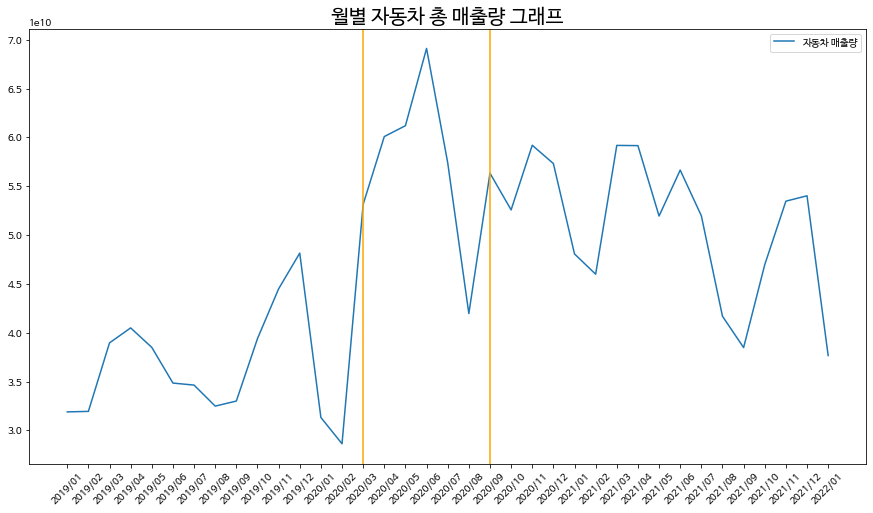

In [ ]:
plt.figure(figsize=(15,8))

sns.lineplot(data=car_total)

plt.axvline(x='2020/03', color='orange')
plt.axvline(x='2020/09', color='orange')
plt.xticks(rotation=45)

plt.title('월별 자동차 총 매출량 그래프', fontsize=20)
plt.show()

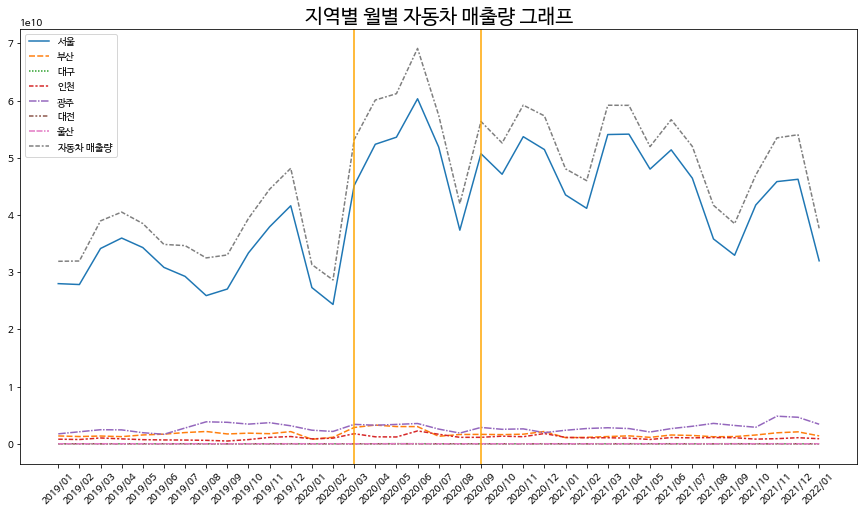

In [ ]:
# 총합 말고 지역별로도 그려보기

plt.figure(figsize=(15,8))

sns.lineplot(data=car_t)

plt.axvline(x='2020/03', color='orange')
plt.axvline(x='2020/09', color='orange')
plt.xticks(rotation=45)

plt.title('지역별 월별 자동차 매출량 그래프', fontsize=20)
plt.show()

# 대중교통 이용량 변화

In [ ]:
import pandas as pd

transport = pd.read_excel("/content/대중교통 발생량.xlsx", thousands = ',')
transport

,시도,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,합계,510197671,439348535,540531780,541733739,560409247,514366859,536467783,515443395,498676528,...,407077495,401408687,411947448,381959553,362194685,370043026,404936993,423076449,415649664,386401244
1,서울특별시,334783379,286602171,351221965,352996728,363021885,333959310,350900397,337579140,324116002,...,267072861,261992845,268279651,244881843,235821806,236801449,258645616,273498383,269639590,251211513
2,부산광역시,70004917,61578823,75293851,74596200,77721210,71376763,72989565,70523377,68612205,...,55481359,56284191,57763613,55420023,50077963,53544317,59516274,60430686,58275939,54067592
3,대구광역시,27985472,24464199,30495006,30060349,31751067,28848413,29779594,28455382,28113891,...,33682307,23841849,23524791,22944774,21243749,22386378,24273311,24867003,24270442,21584283
4,인천광역시,43631395,37853053,46968209,47635168,49517846,45561849,47041877,45270435,44206362,...,24712474,33530578,35648768,32706598,31256278,32346591,35005457,35948123,35471211,34351495
5,광주광역시,11145673,9477874,12241104,12261911,12926142,11607253,11985228,11144032,11303312,...,11549631,8549414,8884737,8619397,8013117,8504695,9124802,9332049,9276453,7984961
6,대전광역시,14993957,12781399,16173102,16123110,17005526,15302093,15709251,15002107,14999271,...,8818485,11719517,11916130,11401534,10458861,10920600,12274220,12722838,12509369,11392837
7,울산광역시,7652878,6591016,8138543,8060273,8465571,7711178,8061871,7468922,7325485,...,5760378,5490293,5929758,5985384,5322911,5538996,6097313,6277367,6206660,5808563


In [ ]:
# 전치

transport = transport.T
transport.head()

,0,1,2,3,4,5,6,7
시도,합계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2019/01,510197671,334783379,70004917,27985472,43631395,11145673,14993957,7652878
2019/02,439348535,286602171,61578823,24464199,37853053,9477874,12781399,6591016
2019/03,540531780,351221965,75293851,30495006,46968209,12241104,16173102,8138543
2019/04,541733739,352996728,74596200,30060349,47635168,12261911,16123110,8060273


In [ ]:
# 시도를 인덱스로

transport.rename(columns= transport.iloc[0], inplace=True)
transport = transport.drop(transport.index[0])
transport.head()

,합계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2019/01,510197671,334783379,70004917,27985472,43631395,11145673,14993957,7652878
2019/02,439348535,286602171,61578823,24464199,37853053,9477874,12781399,6591016
2019/03,540531780,351221965,75293851,30495006,46968209,12241104,16173102,8138543
2019/04,541733739,352996728,74596200,30060349,47635168,12261911,16123110,8060273
2019/05,560409247,363021885,77721210,31751067,49517846,12926142,17005526,8465571


In [ ]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2019/01 to 2022/01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   합계      37 non-null     object
 1   서울특별시   37 non-null     object
 2   부산광역시   37 non-null     object
 3   대구광역시   37 non-null     object
 4   인천광역시   37 non-null     object
 5   광주광역시   37 non-null     object
 6   대전광역시   37 non-null     object
 7   울산광역시   37 non-null     object
dtypes: object(8)
memory usage: 2.6+ KB


In [ ]:
# object를 int로 바꾸기

transport = transport.astype(int)
transport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2019/01 to 2022/01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   합계      37 non-null     int64
 1   서울특별시   37 non-null     int64
 2   부산광역시   37 non-null     int64
 3   대구광역시   37 non-null     int64
 4   인천광역시   37 non-null     int64
 5   광주광역시   37 non-null     int64
 6   대전광역시   37 non-null     int64
 7   울산광역시   37 non-null     int64
dtypes: int64(8)
memory usage: 2.6+ KB


In [ ]:
transport.head()

,합계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2019/01,510197671,334783379,70004917,27985472,43631395,11145673,14993957,7652878
2019/02,439348535,286602171,61578823,24464199,37853053,9477874,12781399,6591016
2019/03,540531780,351221965,75293851,30495006,46968209,12241104,16173102,8138543
2019/04,541733739,352996728,74596200,30060349,47635168,12261911,16123110,8060273
2019/05,560409247,363021885,77721210,31751067,49517846,12926142,17005526,8465571


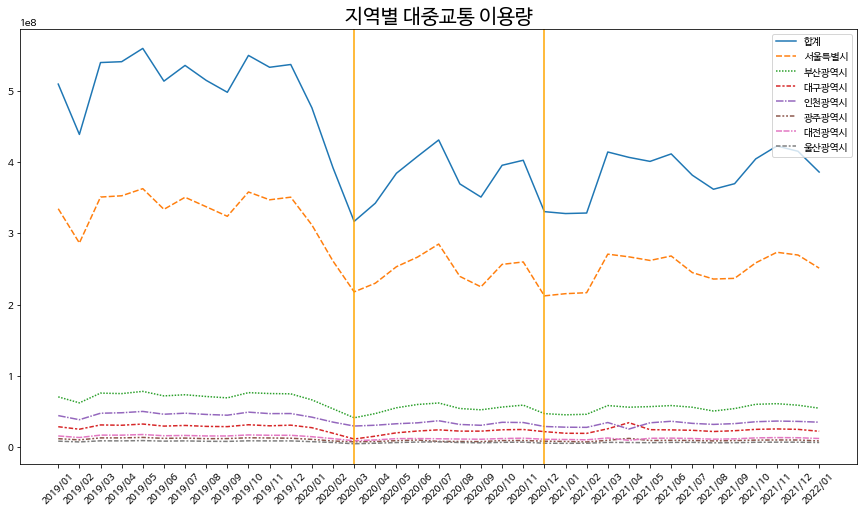

In [ ]:
# 이용량 시계열 그래프

plt.figure(figsize=(15,8))

sns.lineplot(data=transport)

plt.xticks(rotation=45)
plt.axvline(x='2020/03', color='orange')
plt.axvline(x='2020/12', color='orange')

plt.title('지역별 대중교통 이용량', fontsize=20)
plt.show()

지금까지 그린 거
- 자동차 매출 변화 지역별 월별 시계열
- 대중교통 이용량 지역별 월별 시계열

그려야 할 것
- 자가용 이용량 시계열?
- 합쳐서 누적 연속그래프
- 거리두기 전후 대비 대중교통 이용량 증감률 지역별 막대그래프
- 

거리두기 전후 대비 대중교통 이용량 증감률 지역별 막대그래프

In [ ]:
# 2020년 3월 기준으로 거리두기 전 / 후 대중교통 이용량 지역별 합계 내기

# 거리두기 전 월평균 이용량

transport_before = round(transport.loc['2019/01':'2020/02'].sum()/14).astype(int)
transport_before

합계       510614547
서울특별시    333209887
부산광역시     70465670
대구광역시     28256970
인천광역시     44645771
광주광역시     11326336
대전광역시     15109524
울산광역시      7600388
dtype: int64

In [ ]:
# 거리두기 후 월평균 이용량

transport_after = round(transport.loc['2020/03':].sum()/23).astype(int)
transport_after

합계       381341967
서울특별시    248528394
부산광역시     53789741
대구광역시     22081634
인천광역시     32085895
광주광역시      8276955
대전광역시     10945531
울산광역시      5633818
dtype: int64

In [ ]:
# 거리두기 전 후 증감률 = 거리두기 후 / 거리두기 전 - 100

transport_prop = transport_after / transport_before * 100 - 100
transport_prop

합계      -25.317058
서울특별시   -25.413860
부산광역시   -23.665324
대구광역시   -21.854204
인천광역시   -28.132286
광주광역시   -26.922925
대전광역시   -27.558731
울산광역시   -25.874600
dtype: float64

In [ ]:
# 시리즈를 데이터 프레임으로 변환

transport_prop = pd.DataFrame(transport_prop, columns=['증감률'])
transport_prop = transport_prop.sort_values(by='증감률')
transport_prop = transport_prop.T.drop(columns='합계')
transport_prop

,인천광역시,대전광역시,광주광역시,울산광역시,서울특별시,부산광역시,대구광역시
증감률,-28.132286,-27.558731,-26.922925,-25.8746,-25.41386,-23.665324,-21.854204


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


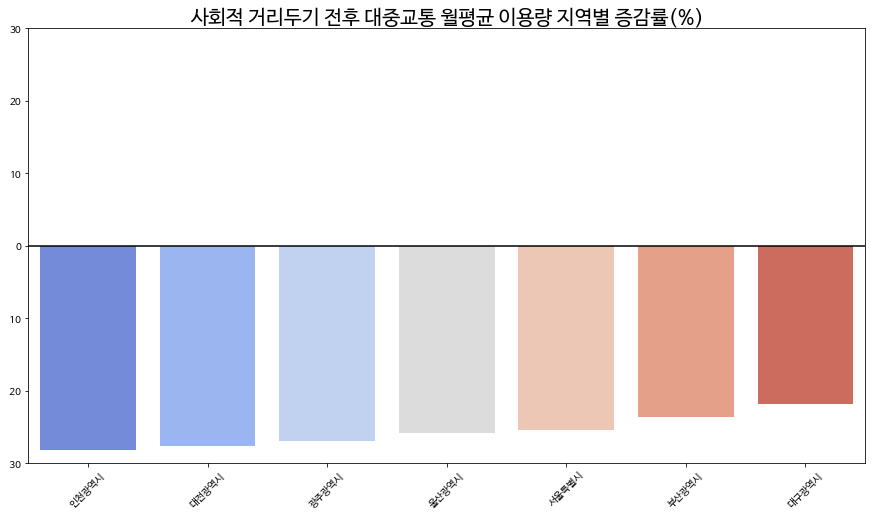

In [ ]:
# 막대그래프

plt.figure(figsize=(15,8))

sns.barplot(data=transport_prop, palette='coolwarm')

plt.xticks(rotation=45)
plt.axhline(0.0, color='black')
plt.ylim(-30, 30)
plt.title("사회적 거리두기 전후 대중교통 월평균 이용량 지역별 증감률(%)", fontsize=20)
plt.show()

In [ ]:
import numpy as np

<Figure size 1080x576 with 0 Axes>

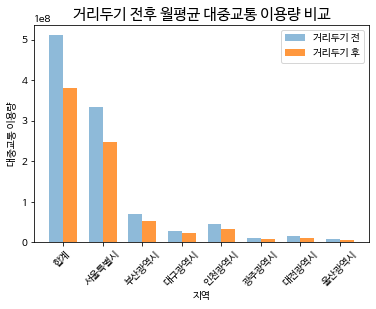

In [ ]:
# 거리두기 전후 월평균 이용량 비교 막대그래프

plt.figure(figsize=(15,8))

x_label = ['합계', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']
x = np.arange(len(x_label))

y_1 = transport_before.values
y_2 = transport_after.values

width = 0.35

fig, axes = plt.subplots()

axes.bar(x - width/2, y_1, width, align='center', alpha=0.5)
axes.bar(x + width/2, y_2, width, align='center', alpha=0.8)

plt.xticks(x)
axes.set_xticklabels(x_label)

plt.ylabel('대중교통 이용량')
plt.xlabel('지역')

plt.legend(['거리두기 전', '거리두기 후'])
plt.title('거리두기 전후 월평균 대중교통 이용량 비교', fontsize=15)
plt.xticks(rotation=45)

plt.show()

누적그래프
- 시간 : 2019/01 ~ 2022/01
- y값 : 전국 대중교통 이용량, 자동차업종매출량

In [ ]:
car_total[['자동차 매출량']]

,자동차 매출량
2019/01,31897843218
2019/02,31948459225
2019/03,38962676373
2019/04,40497589561
2019/05,38499224462
2019/06,34849117765
2019/07,34640416988
2019/08,32489593875
2019/09,33005918923
2019/10,39397600180


In [ ]:
transport[['합계']]

,합계
2019/01,510197671
2019/02,439348535
2019/03,540531780
2019/04,541733739
2019/05,560409247
2019/06,514366859
2019/07,536467783
2019/08,515443395
2019/09,498676528
2019/10,550560962


In [ ]:
ac_x = car_total.index
ac_x

Index(['2019/01', '2019/02', '2019/03', '2019/04', '2019/05', '2019/06',
       '2019/07', '2019/08', '2019/09', '2019/10', '2019/11', '2019/12',
       '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10', '2021/11', '2021/12',
       '2022/01'],
      dtype='object')

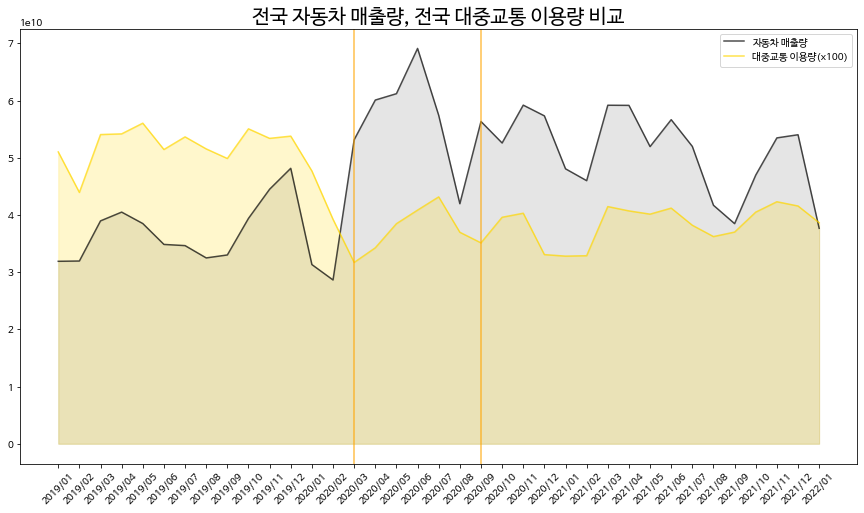

In [ ]:
plt.figure(figsize=(15,8))

ac_y1 = car_total['자동차 매출량']
ac_y2 = transport['합계'] * 100

plt.plot(ac_x, ac_y1, color='black', alpha=0.7)
plt.fill_between(ac_x, ac_y1, color='black', alpha=0.1)
plt.plot(ac_x, ac_y2, color='gold', alpha=0.7)
plt.fill_between(ac_x, ac_y2, color='gold', alpha=0.2)

plt.legend(['자동차 매출량', '대중교통 이용량(x100)'])
plt.axvline(x='2020/03', color='orange', alpha=0.7)
plt.axvline(x='2020/09', color='orange', alpha=0.7)
plt.xticks(rotation=45)
plt.title('전국 자동차 매출량, 전국 대중교통 이용량 비교', fontsize=20)

plt.show()

In [ ]:
(transport_after - transport_before).sort_values()

합계      -129272580
서울특별시    -84681493
부산광역시    -16675929
인천광역시    -12559876
대구광역시     -6175336
대전광역시     -4163993
광주광역시     -3049381
울산광역시     -1966570
dtype: int64